In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.0.8'

In [2]:
import os

In [3]:
cwd = os.getcwd()
print(cwd)

train_dir = os.path.join(cwd, 'train')
train_green_dir = os.path.join(train_dir, 'green')
train_yellow_dir = os.path.join(train_dir, 'yellow')
train_red_dir = os.path.join(train_dir, 'red')
validation_dir = os.path.join(cwd, 'validation')
test_dir = os.path.join(cwd, 'test')

/Users/jason/code/traffic_light_classifier


In [4]:
print('total training green images:', len(os.listdir(train_green_dir)))
print('total training yellow images:', len(os.listdir(train_yellow_dir)))
print('total training red images:', len(os.listdir(train_red_dir)))

total training green images: 22
total training yellow images: 20
total training red images: 23


In [5]:
IMAGE_WIDTH = 85
IMAGE_HEIGHT = 256

In [6]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(3, activation='sigmoid'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 83, 32)       896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 41, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 39, 64)       18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 8, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 6, 128)        147584    
__________

In [8]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              #optimizer=optimizers.RMSprop(lr=1e-4),
              optimizer='adam',
              metrics=['acc'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        batch_size=5,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        batch_size=5,
        class_mode='categorical')

Found 62 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [10]:
# Check the output of the generators
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (5, 256, 85, 3)
labels batch shape: (5, 3)


In [11]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=7,
      validation_data=validation_generator,
      validation_steps=5)

Epoch 1/7
20/20 [==============================] - 4s - loss: 1.0322 - acc: 0.4850 - val_loss: 0.3106 - val_acc: 1.0000
Epoch 2/7
20/20 [==============================] - 4s - loss: 0.2381 - acc: 0.9699 - val_loss: 0.0028 - val_acc: 1.0000
Epoch 3/7
20/20 [==============================] - 4s - loss: 0.0023 - acc: 1.0000 - val_loss: 6.3557e-05 - val_acc: 1.0000
Epoch 4/7
20/20 [==============================] - 4s - loss: 0.3068 - acc: 0.9657 - val_loss: 0.0098 - val_acc: 1.0000
Epoch 5/7
20/20 [==============================] - 4s - loss: 0.0014 - acc: 1.0000 - val_loss: 1.0300e-06 - val_acc: 1.0000
Epoch 6/7
20/20 [==============================] - 4s - loss: 8.5923e-07 - acc: 1.0000 - val_loss: 1.4782e-07 - val_acc: 1.0000
Epoch 7/7
20/20 [==============================] - 4s - loss: 1.7393e-06 - acc: 1.0000 - val_loss: 1.3351e-07 - val_acc: 1.0000


In [12]:
model.save('tf_classifier_2.h5')

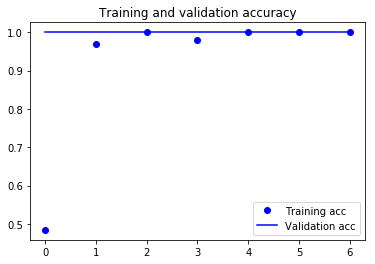

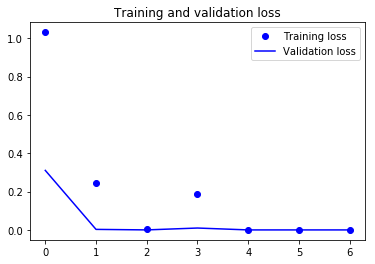

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 [==============================] - 0s
{'green': 0, 'red': 1, 'yellow': 2}
[1]


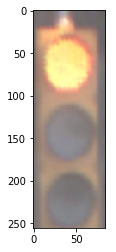

In [18]:
# predicting images

from keras.models import load_model
from keras.preprocessing import image
import numpy as np

img = image.load_img('test/red2.jpg', target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])

model = load_model('tf_classifier_1.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

classes = model.predict_classes(images, batch_size=1)
print(train_generator.class_indices)
print(classes)

plt.imshow(img)
plt.show()